# Introdução ao Framework PyTorch e Implementação de Redes Neurais Densas

- Introdução ao PyTorch
- Operações com tensores
- Treinando uma rede neural densa (fully connected)

In [41]:
# Importando as bibliotecas
import torch
import numpy as np

In [42]:
# Checando a versão
print(torch.__version__)

# Checando se existe GPU compatível com CUDA disponível
print(torch.cuda.is_available())

2.5.1+cu124
True


In [43]:
# Criando tensores

x = torch.tensor([1])
print(x) # exibe o valor do tensor
print(type(x)) # exibe o tipo <class 'torch.Tensor'>
print(x.shape) # exibe o shape (dimensões) do tensor, nesse caso [1].

tensor([1])
<class 'torch.Tensor'>
torch.Size([1])


In [44]:
# Tensores multidimensionais

# x2 é um tensor com duas linhas e duas colunas. Observe o uso do . (ponto) na criação do tensor.
# isso indica um tensor de números float.
x2 = torch.tensor([[1., 2.],
                   [3., 4.]])

print(x2) # exibe o valor do tensor
print(x2.shape) # exibe o shape (dimensões) do tensor, nesse caso [2,2]
print(x2.size()) # exibe o shape (dimensões) do tensor, nesse caso [2,2]

tensor([[1., 2.],
        [3., 4.]])
torch.Size([2, 2])
torch.Size([2, 2])


In [45]:
# Tensor preenchido com números 1, com dimensões [5,2] (5 linhas, 2 colunas)

tensor_ones = torch.ones([5, 2], dtype=torch.float)
print(tensor_ones)
print(tensor_ones.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])
torch.Size([5, 2])


In [46]:
# Tensor preenchido com números 0, com dimensões [3,3,2].

tensor_zeros = torch.zeros([3, 3, 2], dtype=torch.float)
print(tensor_zeros)
print(tensor_zeros.shape)

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])
torch.Size([3, 3, 2])


In [47]:
# Tensor preenchido com números aleatórios, com dimensões [3,3,2]

tensor_random = torch.randn([2, 2], dtype=torch.float)
print(tensor_random)
print(tensor_random.shape)

tensor([[-0.6151, -0.9911],
        [ 0.6422,  1.1038]])
torch.Size([2, 2])


In [48]:
# Criando um tensor a partir de um numpy array

np_array = np.array([[2, 3], [4, 5], [6, 7]])
print(np_array)
print(type(np_array))

torch_array = torch.from_numpy(np_array)
print(torch_array)

[[2 3]
 [4 5]
 [6 7]]
<class 'numpy.ndarray'>
tensor([[2, 3],
        [4, 5],
        [6, 7]])


In [49]:
# Criando um tensor a partir de um list

list_array = [[2, 3], [4, 5], [6, 7]]
print(list_array)
print(type(list_array))

torch_array = torch.tensor(list_array)
print(torch_array)

[[2, 3], [4, 5], [6, 7]]
<class 'list'>
tensor([[2, 3],
        [4, 5],
        [6, 7]])


In [50]:
# Usando o Autograd para calcular derivadas

# observe o uso do parâmetro requires_grad, que informa ao PyTorch se essa varíavel.
# será usada no processo de cálculo das derivadas.

x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

print(x)
print(w)
print(b)

tensor(1., requires_grad=True)
tensor(2., requires_grad=True)
tensor(3., requires_grad=True)


In [51]:
# Construir um grafo de computação

y = w * x + b # y = 2 * x + 3
print(y) # nesse caso y será um tensor com valor 5.

tensor(5., grad_fn=<AddBackward0>)


In [52]:
# Calcula (e acumula) o gradiente da função y anterior em relação a todas as variáveis

# no grafo de computação que possuem "requires_grad=True".
y.backward()

In [53]:
# Mostra o gradiente de cada varíavel

print(x.grad) # dy/dx = w => 2
print(w.grad) # dy/dw = x => 1
print(b.grad) # dy/db = 1 (constante)

tensor(2.)
tensor(1.)
tensor(1.)


In [54]:
# Experimente executar repetidas vezes essa célula e veja que os gradientes serão acumulados

# Para zerar o gradiente, descomente as seguintes linhas:
# x.grad.zero_()
# w.grad.zero_()
# b.grad.zero_()

In [55]:
# =================================================================
# Vamos implementar o mesmo grafo de computação que usamos no Ciclo 1
# para demonstrar os cálculos do Backpropagation. Lembre-se de que:
# x: variável de entrada de dados, ela não é parâmetro da rede, portanto
# não vamos calcular a derivada dela.
# y: valor alvo (target), também não é parâmetro da rede, logo não a derivamos.
# w: parâmetro weight (w), essa sim será usada no cálculo.
# b: parâmetro bias (b), essa sim será usada no cálculo.
# y_pred: resultado da nossa rede. Será o valor a ser comparado com y (alvo).
# Loss será o MSE (Mean Squared Error): (y_pred - y)^2
# ================================================================

In [56]:
x = torch.tensor(1.)
y = torch.tensor(2.)

class SimpleNN():
  def __init__(self):
    self.w = torch.tensor(1.0, requires_grad=True)
    self.b = torch.tensor(0., requires_grad=True)
    self.learn_rate = 0.4

# calcula o forward_pass da rede
  def forward_fn(self, x):
    self.y_pred = self.w * x + self.b
    return self.y_pred

# calcula a loss, ou seja, a diferença entre o valor alvo (y) e o valor da rede (y_pred)
  def loss_fn(self, y):
    self.loss = (self.y_pred - y)**2
    return self.loss

# calcula (e acumula) o gradiente da função de loss em relação a todas as variáveis
# no grafo de computação que possuem "requires_grad=True", ou seja w e b
  def grad_fn(self):
    self.loss.backward()

# Aplica o gradient descent para atualizar as variáveis w e b, usando learn_rate = 0.4
# Utiliza o contexto torch.no_grad() para que essa computação não seja rastreada
# pelo mecanismo de autograd
  def backward_fn(self):
    with torch.no_grad():
      self.w -= self.learn_rate * self.w.grad
      self.b -= self.learn_rate * self.b.grad
      self.w.grad.zero_()
      self.b.grad.zero_()

In [57]:
# Vamos executar em um loop e exibir os valores a cada passo
model = SimpleNN()

for i in range(1, 10):
  model.forward_fn(x) # 1. calcula a saída da rede y_pred
  model.loss_fn(y) # 2. calcula a loss
  model.grad_fn() # 3. calcula o gradiente
  print(f'n======= Iteração {i} =======')
  print(f'LOSS....: {model.loss.item():.4f}')
  print(f'y_pred..: {model.y_pred.item():.4f}')
  print(f'y (alvo): {y:.4f}')
  print(f'w.......: {model.w.item():.4f}')
  print(f'b.......: {model.b.item():.4f}')
  print(f'dloss/dw: {model.w.grad.item():.4f}')
  print(f'dloss/db: {model.b.grad.item():.4f}')
  model.backward_fn() # 4. realiza o Backpropagation

n======= Iteração 1 =======
LOSS....: 1.0000
y_pred..: 1.0000
y (alvo): 2.0000
w.......: 1.0000
b.......: 0.0000
dloss/dw: -2.0000
dloss/db: -2.0000
n======= Iteração 2 =======
LOSS....: 0.3600
y_pred..: 2.6000
y (alvo): 2.0000
w.......: 1.8000
b.......: 0.8000
dloss/dw: 1.2000
dloss/db: 1.2000
n======= Iteração 3 =======
LOSS....: 0.1296
y_pred..: 1.6400
y (alvo): 2.0000
w.......: 1.3200
b.......: 0.3200
dloss/dw: -0.7200
dloss/db: -0.7200
n======= Iteração 4 =======
LOSS....: 0.0467
y_pred..: 2.2160
y (alvo): 2.0000
w.......: 1.6080
b.......: 0.6080
dloss/dw: 0.4320
dloss/db: 0.4320
n======= Iteração 5 =======
LOSS....: 0.0168
y_pred..: 1.8704
y (alvo): 2.0000
w.......: 1.4352
b.......: 0.4352
dloss/dw: -0.2592
dloss/db: -0.2592
n======= Iteração 6 =======
LOSS....: 0.0060
y_pred..: 2.0778
y (alvo): 2.0000
w.......: 1.5389
b.......: 0.5389
dloss/dw: 0.1555
dloss/db: 0.1555
n======= Iteração 7 =======
LOSS....: 0.0022
y_pred..: 1.9533
y (alvo): 2.0000
w.......: 1.4767
b.......: 0.4767

In [58]:
# Importando as bibliotecas
import torch
from torch import nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(43)

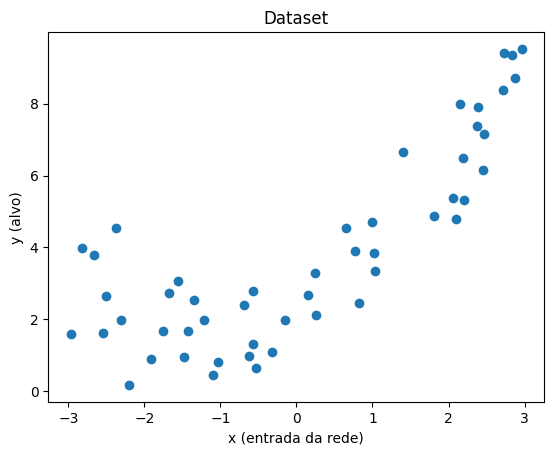

In [59]:
# Gerar um dataset de 50 números aleatórios
n = 50
x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(n, 1)
plt.title('Dataset')
plt.scatter(x, y)
plt.xlabel('x (entrada da rede)')
plt.ylabel('y (alvo)')
plt.show()

In [60]:
# Modelo 1 - Treinar uma rede neural com três layers

class LinearModel(nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.layer_1 = nn.Linear(1, 5)
    self.layer_2 = nn.Linear(5, 10)
    self.layer_3 = nn.Linear(10, 1)

  def forward(self, x):
    x = self.layer_1(x) # resulta em um tensor [50,5]
    x = self.layer_2(x) # resulta em um tensor [50,10]
    x = self.layer_3(x) # resulta em um tensor [50,1]
    return x

linear_model = LinearModel()

In [61]:
# Utiliza a MSE loss do próprio PyTorch
loss_fn = torch.nn.MSELoss()

# Em vez de atualizar todos os parâmetros w da rede, um a um, vamos usar o otimizador do PyTorch
otimizador = SGD(linear_model.parameters(), lr=0.01)

In [62]:
# Inicializar o modelo e converter o numpy array para tensor

x_tensor = torch.tensor(x, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)
print(x_tensor.shape) # um tensor de dimensões [200,1], isto é, 200 linhas e 1 coluna

torch.Size([50, 1])


In [63]:
# Realizar um feedforward, ou seja, predizer um valor para cada entrada
# do dataset. Temos 200 entradas, portanto teremos 200 saídas (y_hat)

y_pred = linear_model(x_tensor)

# %% Calcular a loss usando a classe MSELoss do PyTorch

loss = loss_fn(y_pred, y_tensor)

print(loss)

tensor(24.8867, grad_fn=<MseLossBackward0>)


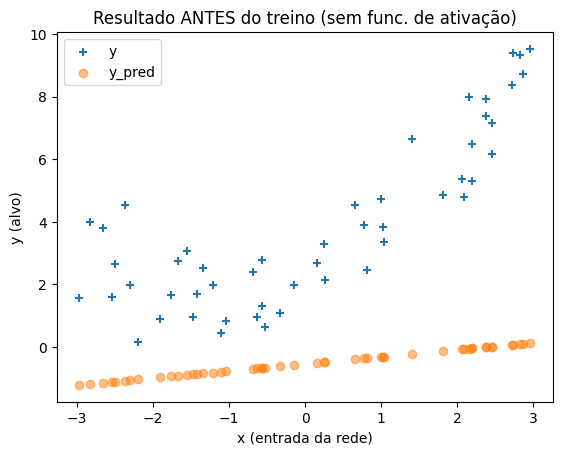

In [64]:
# Exibir um gráfico mostrando o valor alvo (y) e o valor gerado pela rede (y_pred)

plt.title('Resultado ANTES do treino (sem func. de ativação)')
plt.scatter(x, y, marker='+', label='y')
plt.scatter(x, y_pred.detach().numpy(), label='y_pred', alpha=0.5)
plt.xlabel('x (entrada da rede)')
plt.ylabel('y (alvo)')
plt.legend()
plt.show()

In [65]:
# Treinar a rede por 1000 epochs

for i in range(1000):
  # Forward pass
  y_pred = linear_model(x_tensor)

  # Calcular a loss
  loss = loss_fn(y_pred, y_tensor)

  # Calcular gradiente
  loss.backward()

  # Otimizar usando o otimizador SGD (Stocastich Gradient Descent)
  # essa função realiza as operações do exemplo anterior
  # w -= w * learn_rate * w.grad
  # b -= b * learn_rate * b.grad
  otimizador.step()
  otimizador.zero_grad()

  # Exibir o status do treinamento
  print(f'Epoch: {i} - Loss: {loss.item():.4f}')

Epoch: 0 - Loss: 24.8867
Epoch: 1 - Loss: 16.9519
Epoch: 2 - Loss: 12.7280
Epoch: 3 - Loss: 10.1860
Epoch: 4 - Loss: 8.5301
Epoch: 5 - Loss: 7.2962
Epoch: 6 - Loss: 6.2976
Epoch: 7 - Loss: 5.4726
Epoch: 8 - Loss: 4.7939
Epoch: 9 - Loss: 4.2422
Epoch: 10 - Loss: 3.8010
Epoch: 11 - Loss: 3.4545
Epoch: 12 - Loss: 3.1878
Epoch: 13 - Loss: 2.9866
Epoch: 14 - Loss: 2.8380
Epoch: 15 - Loss: 2.7303
Epoch: 16 - Loss: 2.6537
Epoch: 17 - Loss: 2.6002
Epoch: 18 - Loss: 2.5634
Epoch: 19 - Loss: 2.5384
Epoch: 20 - Loss: 2.5216
Epoch: 21 - Loss: 2.5105
Epoch: 22 - Loss: 2.5031
Epoch: 23 - Loss: 2.4983
Epoch: 24 - Loss: 2.4952
Epoch: 25 - Loss: 2.4932
Epoch: 26 - Loss: 2.4919
Epoch: 27 - Loss: 2.4911
Epoch: 28 - Loss: 2.4905
Epoch: 29 - Loss: 2.4902
Epoch: 30 - Loss: 2.4900
Epoch: 31 - Loss: 2.4898
Epoch: 32 - Loss: 2.4898
Epoch: 33 - Loss: 2.4897
Epoch: 34 - Loss: 2.4897
Epoch: 35 - Loss: 2.4896
Epoch: 36 - Loss: 2.4896
Epoch: 37 - Loss: 2.4896
Epoch: 38 - Loss: 2.4896
Epoch: 39 - Loss: 2.4896
Epoch:

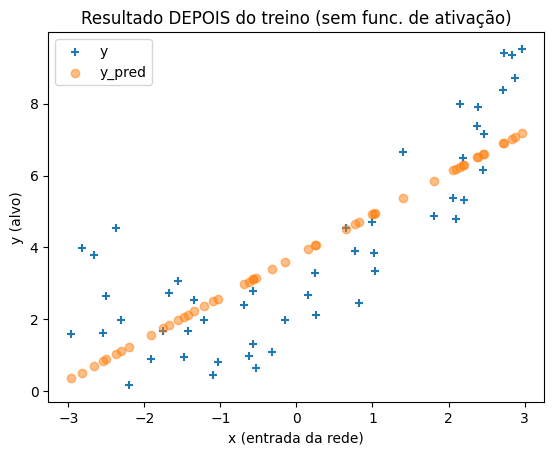

In [66]:
# Exibir um gráfico mostrando o valor alvo (y) e o valor gerado pela rede (y_pred)

# Após treinar por 1000 épocas, podemos ver que a loss não baixou além de um certo valor.
# Isso foi o melhor que conseguimos com essa rede neural.
# Vamos plotar o gráfico novamente agora com a rede treinada.

plt.title('Resultado DEPOIS do treino (sem func. de ativação)')
plt.scatter(x, y, marker='+', label='y')
plt.scatter(x, y_pred.detach().numpy(), label='y_pred', alpha=0.5)
plt.xlabel('x (entrada da rede)')
plt.ylabel('y (alvo)')
plt.legend()
plt.show()